<a href="https://www.kaggle.com/code/abeeradel/malaria-detection-from-blood-cells?scriptVersionId=108346274" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Libraries:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers


import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


# Config:

In [2]:
WIDTH = 151
HEIGHT = 136
BATCH_SIZE = 32
CHANNELS =3
EPOCHS = 30
NEW_SIZE = 136
TRAIN_PATH = '/kaggle/input/malaria-detection-dataset/Dataset/Train'
TEST_PATH = '/kaggle/input/malaria-detection-dataset/Dataset/Test'

# Data:

In [3]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=TRAIN_PATH,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 416 files belonging to 2 classes.


In [4]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
            directory=TEST_PATH,
            shuffle=True,
            image_size=(WIDTH,HEIGHT),
            batch_size = BATCH_SIZE,
)

Found 134 files belonging to 2 classes.


In [5]:
classnames = train_dataset.class_names
classnames

['Parasite', 'Uninfected']

# Plotting Some Images:

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

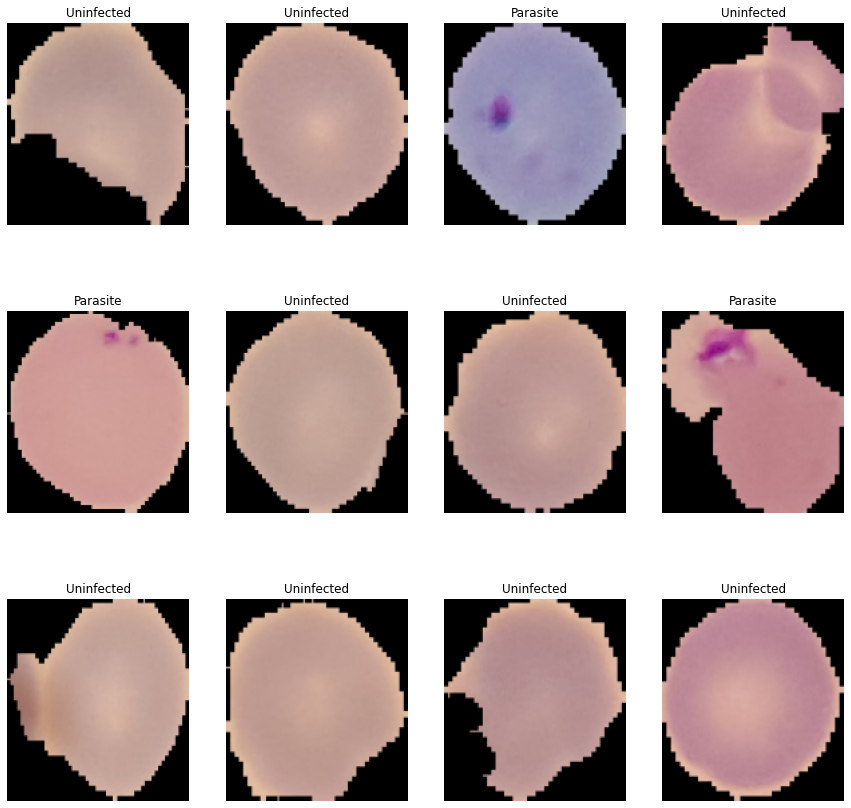

In [6]:
plt.figure(figsize = (15,15))
for image, label in train_dataset.take(1):
    for i in range(12):
        plt.subplot(3, 4, i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(classnames[label[i]])
        plt.axis('off')
    
    

# Splitting Data:
* 90% for Trainig
* 10% for Validation

In [7]:
def split_data(ds, train_ratio = .9, shuffle = True, shuffle_size = 1000):
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    ds_size = len(ds)
    train_size = int(ds_size * train_ratio)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size)
    
    return train_ds, val_ds
    
    

In [8]:
train_ds, val_ds = split_data(train_dataset)

In [9]:
len(train_ds), len(val_ds)

(11, 2)

# Cashing:

In [10]:
# caching,shuffle and prefetching the data
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

# Preprocessing:

In [11]:
# Image Preprocessing : Rescaling and Resizing
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(WIDTH, HEIGHT),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [12]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(factor = 0.3)
])

# Modeling

In [13]:
input_shape = (BATCH_SIZE, WIDTH, HEIGHT, CHANNELS)

In [14]:
input_shape

(32, 151, 136, 3)

In [15]:
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(64, (3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation = 'relu', padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(256, (3,3), activation = 'relu',padding ='SAME'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation= 'sigmoid')
    
])

In [16]:
model.compile(
    optimizer= 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [17]:
history = model.fit(train_ds,
         epochs= EPOCHS,
         batch_size= BATCH_SIZE,
         verbose= 1,
         validation_data= val_ds)


Epoch 1/30


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

11/11 [==============================] - ETA: 0s - loss: 0.8888 - accuracy: 0.4943

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

11/11 [==============================] - 9s 100ms/step - loss: 0.8888 - accuracy: 0.4943 - val_loss: 0.6918 - val_accuracy: 0.7500


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


Epoch 2/30
11/11 [==============================] - 0s 33ms/step - loss: 0.6943 - accuracy: 0.5227 - val_loss: 0.6933 - val_accuracy: 0.4688
Epoch 3/30
11/11 [==============================] - 0s 31ms/step - loss: 0.6891 - accuracy: 0.5568 - val_loss: 0.6747 - val_accuracy: 0.6875
Epoch 4/30
11/11 [==============================] - 0s 29ms/step - loss: 0.6553 - accuracy: 0.6222 - val_loss: 0.5796 - val_accuracy: 0.7188
Epoch 5/30
11/11 [==============================] - 0s 29ms/step - loss: 0.6892 - accuracy: 0.5398 - val_loss: 0.7057 - val_accuracy: 0.4688
Epoch 6/30
11/11 [==============================] - 0s 29ms/step - loss: 0.6952 - accuracy: 0.5028 - val_loss: 0.6913 - val_accuracy: 0.5156
Epoch 7/30
11/11 [==============================] - 0s 29ms/step - loss: 0.6894 - accuracy: 0.5568 - val_loss: 0.6914 - val_accuracy: 0.4688
Epoch 8/30
11/11 [==============================] - 0s 30ms/step - loss: 0.6840 - accuracy: 0.5114 - val_loss: 0.6775 - val_accuracy: 0.6406
Epoch 9/30
11

# Evaluating Model

In [18]:
scores = model.evaluate(test_ds)

Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup ca

5/5 [==============================] - 0s 28ms/step - loss: 0.4123 - accuracy: 0.8284


Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...
Cleanup called...


In [19]:
# Getting the model history to analyse
train_loss = history.history['loss']
train_acc = history.history['accuracy']

val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

Text(0.5, 1.0, 'Training and Validation Loss')

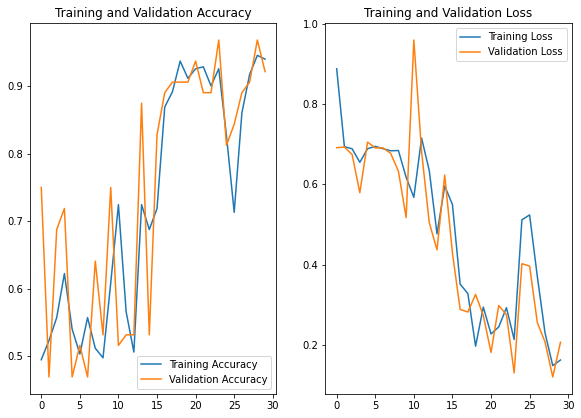

In [20]:
#graphs for accuracy and loss of training and validation data
plt.figure(figsize = (15,15))
plt.subplot(2,3,1)
plt.plot(range(EPOCHS), train_acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title('Training and Validation Accuracy') 

plt.subplot(2,3,2)
plt.plot(range(EPOCHS), train_loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')
plt.title('Training and Validation Loss')

# Make prediction:

model.predict(t

In [21]:
def predict_malaria(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img.numpy())
    img_array = tf.expand_dims(img_array, 0)

    prediction = np.squeeze(model.predict(img_array))
    if prediction < .5:
        pred_class = classnames[0]
        confidence = np.round((1- prediction)* 100, 2)
    else:
        pred_class = classnames[1]
        confidence = np.round(prediction* 100, 2)
        
  
    return pred_class, confidence

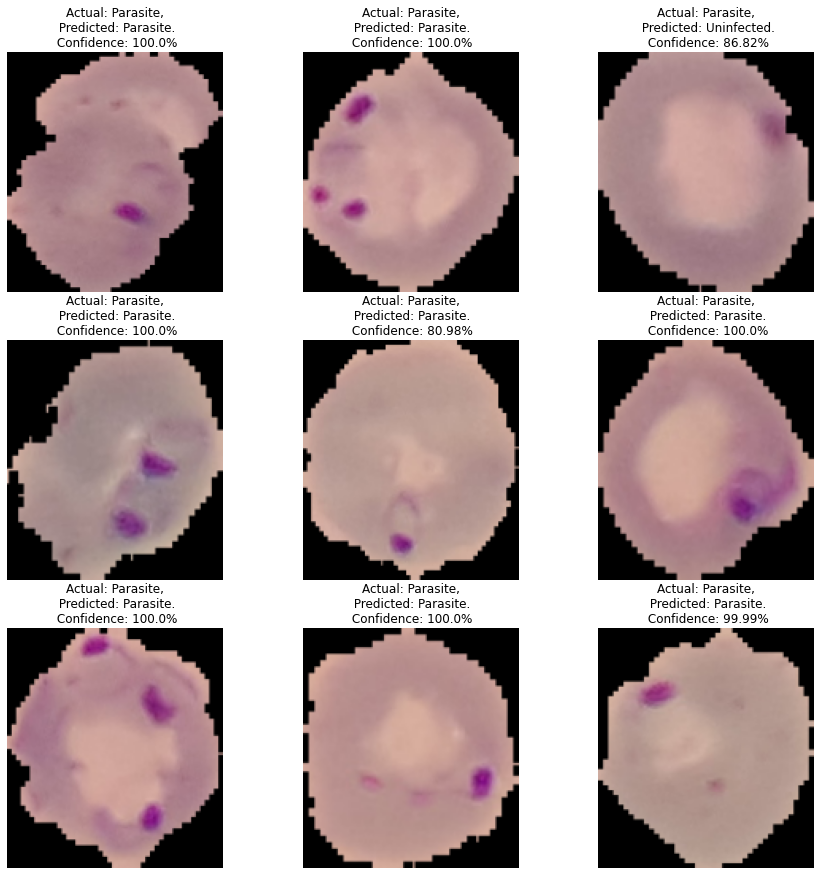

In [22]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict_malaria(model, images[i])
        actual_class = classnames[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")


# Save Model:

In [23]:
model.save('malaria_pred_cnn.h5')